# Housing - exploratory data analysis (VISUALIZE)

NYC housing dataset b/w in 2012-13, seperated by boroughs


- [ ] get an intuitive understanding, 
- [ ] clear data
- [ ] adjust columns data types
- [ ] adjust columns
- [ ] enrich
- [ ] outlier and missing values
- [ ] visualize for yourself
- [ ] visualize for client
- [x] make cross comparisons
- [ ] then **create an OUTPUT file for other models**



##### Notes
- uses _created OUTPUT file_ at EDA stage 
- **raw_data** is readed file w/ proper types and formats (from previous step!!!)
- **data**, contains after missing values (sale_price) and necessary columns eliminated

### possible deletion columns: 
   - borough, building_class_category .. (extracted into diff. columns)
   - block, lot (nonsense)
   - easement (%100 empty), 
   - apartment_number (%74 empty)
   - 50% of estates has 0 land_square_feet
   - 50% of estates has 0 gross_square_feet
   - **30% of sale_price is 0 (28K+)**

### domain knowledge 
  - building_class_at_present: may be mapped into 3 groups to use later ?
  - building_class_at_present vs building_class_at_sale change has any meaning?
  - tax_class_at_present vs tax_class_at_sale has any meaning? (1, 2 and 4 is dominating values)
  - 10019 zipcode is %7 of houses, and 70K houses are located in of 100 zipcodes
  - 50% of estates has 0 land_square_feet and gross_square_feet. can be groupped into less categories?
  - 4000+ diff. apartment_number in 85K rows.
  - residential_units (165 types), %50 is 0 and 1 (40K+ rows) and 30K+ NaN. can be grouped into less categories?
  - commercial_units (23 types), 0 has 20K+, NaN is 60K+
  - can residential_units and commercial_units be used meaningful dummy column?
  - total_units (171 types), 1 (25K+, 0 (16K+), 2 (8K+) and NaN is 30K
     - total = residental + commercial ?
     - if there are dif, can we set to commercial or we should delete  or we may use to create a dummy category ?
     - if total = 0 , what we should do?
  - top 50 neighborhood covers 50K+ houses

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns


sns.set()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 250)

In [31]:
raw_data = pd.read_csv('dataset/housing/output_after_eda.csv', \
                       dtype={"building_class": object, "tax_class_at_sale": object, 
                              'sale_price': np.int64, 'zipcode': np.int64, 'residential_units': np.str_ }, \
                       parse_dates=['sale_date'], \
                       infer_datetime_format=True)



raw_data.head(3)

,borough_name,neighborhood,building_class_name,tax_class_at_present,block,lot,building_class_at_present,address_,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price
0,Manhattan,NaN,CONDOS - ELEVATOR APARTMENTS,,738,1306,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2013-05-20,2214693
1,Manhattan,NaN,CONDOS - ELEVATOR APARTMENTS,,738,1307,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2013-05-16,1654656
2,Manhattan,NaN,CONDOS - ELEVATOR APARTMENTS,,738,1308,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2013-05-23,1069162


In [26]:
raw_data.dtypes

borough_name                         object
neighborhood                         object
building_class_name                  object
tax_class_at_present                 object
block                                 int64
lot                                   int64
building_class_at_present            object
address_                             object
zipcode                               int64
residential_units                    object
commercial_units                     object
total_units                          object
land_square_feet                      int64
gross_square_feet                     int64
year_built                            int64
sale_date                    datetime64[ns]
sale_price                            int64
dtype: object

In [32]:
raw_data.describe(include='all')

,borough_name,neighborhood,building_class_name,tax_class_at_present,block,lot,building_class_at_present,address_,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price
count,57337,57313,55795,57337,57337.000000,57337.000000,57337,57337,57337.000000,57337,57337.0,57337,5.733700e+04,5.733700e+04,57337.000000,57337,5.733700e+04
unique,5,253,38,11,NaN,NaN,148,45355,NaN,156,66.0,165,NaN,NaN,NaN,364,NaN
top,Manhattan,MIDTOWN WEST,COOPS - ELEVATOR APARTMENTS,2,NaN,NaN,D4,102 WEST 57TH STREET,NaN,0,0.0,1,NaN,NaN,NaN,2012-12-20 00:00:00,NaN
freq,19802,3552,12525,26470,NaN,NaN,12257,917,NaN,22297,29435.0,24163,NaN,NaN,NaN,545,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-26 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,3537.156321,390.941486,NaN,NaN,10735.995483,NaN,NaN,NaN,2.646107e+03,4.990400e+03,1741.270785,NaN,1.327176e+06
std,NaN,NaN,NaN,NaN,3337.968405,653.959768,NaN,NaN,635.328341,NaN,NaN,NaN,4.911882e+04,2.792142e+04,600.996739,NaN,1.151479e+07
min,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,1059.000000,22.000000,NaN,NaN,10025.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1917.000000,NaN,2.600000e+05


## missing and outliers

# visualize

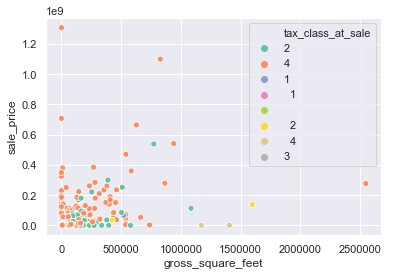

In [33]:
ax1 = sns.scatterplot(x='gross_square_feet', y='sale_price', hue='tax_class_at_sale', palette='Set2', data=raw_data)


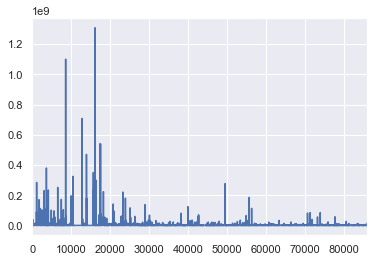

In [13]:
ax2 = raw_data.sale_price.plot()

# cross analysis

In [5]:
# k = raw_data[['building_class_name', 'residential_units']] 


# k.groupby([ 'building_class_name', 'residential_units']).size()#.sort_values(ascending=False).unstack('residential_units')#.plot(kind='pie')